In [49]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [50]:
df = pd.read_csv("Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3749,3750,15675360,Valenzuela,427,France,Male,33,8,0.00,1,1,1,13858.95,0
9588,9589,15744914,Moore,539,Germany,Male,42,1,177728.55,1,1,0,105013.63,0
9749,9750,15767594,Azubuike,533,France,Female,35,8,0.00,2,1,1,187900.12,0
2868,2869,15707968,Akobundu,545,Spain,Male,36,8,73211.12,2,1,0,89587.34,1
6764,6765,15645839,Yudin,570,France,Male,37,6,0.00,1,1,1,187758.50,0


In [51]:
df.drop('RowNumber',axis='columns',inplace=True)

In [53]:
df.drop('CustomerId',axis='columns',inplace=True)

In [55]:
df.drop('Surname',axis='columns',inplace=True)

In [56]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [57]:
df[pd.to_numeric(df.EstimatedSalary,errors='coerce').isnull()].shape

(0, 11)

In [58]:
def uniqueColumn(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}') 

In [59]:
uniqueColumn(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [60]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)
df['Gender'].unique()

array([1, 0], dtype=int64)

In [61]:
df.dtypes

CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [62]:
df[(df.Geography).isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [63]:
df2 = pd.get_dummies(data=df, columns=['Geography'])
df2.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [64]:
df2.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
7625,598,0,19,3,150348.37,1,1,1,173784.04,0,0,1,0
2259,686,1,41,4,129553.76,2,1,0,187599.80,0,1,0,0
3278,640,0,44,7,111833.47,1,1,0,67202.74,0,1,0,0
1949,516,1,43,2,112773.73,2,1,1,139366.58,0,1,0,0
7865,691,0,30,9,0.00,2,0,1,10963.04,0,0,0,1


In [65]:
df2.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [66]:
df2['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

In [80]:
cols_to_scale=['Age','Balance','EstimatedSalary','CreditScore','Tenure']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [81]:
df2[cols_to_scale]= scaler.fit_transform(df2[cols_to_scale])

In [82]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [83]:
X=df2.drop('Exited',axis='columns')
y=df2['Exited']

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [85]:
X_train.shape

(8000, 12)

In [86]:
X_test.shape

(2000, 12)

In [87]:
X_train

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7751,0.800,1,0.283784,0.6,0.000000,2,0,0,0.096273,0,0,1
4154,0.752,0,0.216216,0.3,0.000000,2,1,0,0.981478,1,0,0
3881,0.476,1,0.621622,0.3,0.000000,1,1,1,0.948551,1,0,0
9238,0.846,1,0.432432,0.4,0.000000,2,1,0,0.646869,1,0,0
5210,0.402,0,0.229730,0.7,0.517012,2,0,0,0.434670,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3046,0.616,1,0.175676,0.3,0.530108,1,0,1,0.731708,0,1,0
9917,0.570,0,0.472973,0.8,0.466347,1,0,1,0.618234,0,1,0
4079,0.466,1,0.175676,0.4,0.633639,1,1,0,0.062643,1,0,0
2254,0.658,0,0.243243,0.6,0.588819,1,0,1,0.862531,1,0,0


In [88]:
len(X_train.columns)

12

In [89]:

import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [90]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
250/250 [==============================] - 0s 645us/step - loss: 0.5205 - accuracy: 0.7871
Epoch 2/50
250/250 [==============================] - 0s 689us/step - loss: 0.4722 - accuracy: 0.7960
Epoch 3/50
250/250 [==============================] - 0s 725us/step - loss: 0.4623 - accuracy: 0.7960
Epoch 4/50
250/250 [==============================] - 0s 701us/step - loss: 0.4551 - accuracy: 0.7960
Epoch 5/50
250/250 [==============================] - 0s 689us/step - loss: 0.4500 - accuracy: 0.7960
Epoch 6/50
250/250 [==============================] - 0s 813us/step - loss: 0.4453 - accuracy: 0.7960
Epoch 7/50
250/250 [==============================] - 0s 793us/step - loss: 0.4415 - accuracy: 0.7962
Epoch 8/50
250/250 [==============================] - 0s 629us/step - loss: 0.4379 - accuracy: 0.8000
Epoch 9/50
250/250 [==============================] - 0s 633us/step - loss: 0.4338 - accuracy: 0.8061
Epoch 10/50
250/250 [==============================] - 0s 665us/step - loss: 0.428

In [91]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 595us/step - loss: 0.3839 - accuracy: 0.8275


[0.3838668167591095, 0.8274999856948853]

In [92]:
y_predict=model.predict(X_test)

In [93]:
y_predict

array([[0.03651735],
       [0.14692757],
       [0.03457755],
       ...,
       [0.01083845],
       [0.01464438],
       [0.04526326]], dtype=float32)

In [94]:
y_pred = []
for element in y_predict:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [101]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [102]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [103]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1595
           1       0.69      0.26      0.38       405

    accuracy                           0.83      2000
   macro avg       0.77      0.62      0.64      2000
weighted avg       0.81      0.83      0.80      2000



Text(69.0, 0.5, 'Truth')

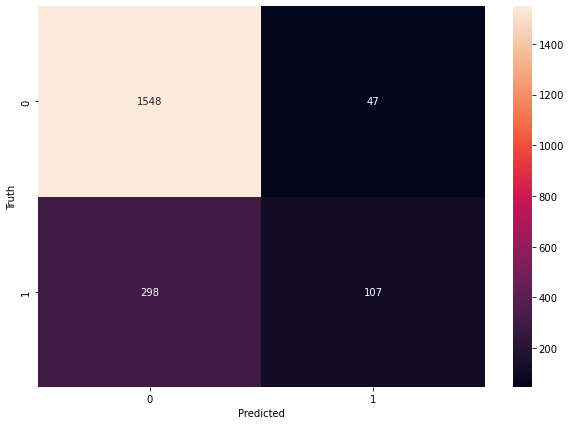

In [104]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [105]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [106]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(12, input_dim=12, activation='relu'),
        keras.layers.Dense(6, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

Undersampling:

In [108]:
# Class count
count_class_0, count_class_1 = df2.Exited.value_counts()

In [109]:
count_class_0, count_class_1 

(7963, 2037)

In [110]:
df_class_0 = df2[df2['Exited'] == 0]
df_class_1 = df2[df2['Exited'] == 1]

In [115]:
df_class_0.shape,df_class_1.shape

((7963, 13), (2037, 13))

In [123]:
df_class_0_undersampling=df_class_0.sample(count_class_1)
df_class_0_undersampling

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
9992,0.752,0,0.243243,0.2,0.000000,1,1,0,0.975997,0,0,0,1
3233,0.490,0,0.243243,0.6,0.341846,1,1,1,0.123968,0,0,0,1
9669,0.648,0,0.256757,0.3,0.000000,1,1,0,0.790267,0,1,0,0
5890,0.264,0,0.270270,0.4,0.498115,1,1,0,0.179200,0,1,0,0
2028,0.216,1,0.283784,0.9,0.000000,2,1,0,0.581713,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3056,0.670,0,0.540541,0.1,0.417686,1,1,1,0.770923,0,1,0,0
4593,0.566,1,0.351351,0.7,0.000000,2,1,0,0.148763,0,1,0,0
6485,0.580,0,0.108108,0.5,0.360317,1,1,1,0.016437,0,0,1,0
3704,0.508,1,0.216216,0.7,0.000000,2,1,0,0.965142,0,1,0,0


In [124]:
df_test_under = pd.concat([df_class_0_undersampling, df_class_1], axis=0)

In [125]:
print(df_test_under.Exited.value_counts())

0    2037
1    2037
Name: Exited, dtype: int64


In [127]:
X = df_test_under.drop('Exited',axis='columns')
y = df_test_under['Exited']


In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [129]:
y_train.value_counts()

1    1630
0    1629
Name: Exited, dtype: int64

In [131]:
X_train.shape


(3259, 12)

In [132]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 0s 800us/step - loss: 0.6608 - accuracy: 0.6161
Epoch 2/100
102/102 [==============================] - 0s 790us/step - loss: 0.6373 - accuracy: 0.6536
Epoch 3/100
102/102 [==============================] - 0s 820us/step - loss: 0.6224 - accuracy: 0.6784
Epoch 4/100
102/102 [==============================] - 0s 770us/step - loss: 0.6111 - accuracy: 0.6889
Epoch 5/100
102/102 [==============================] - 0s 780us/step - loss: 0.6014 - accuracy: 0.6944
Epoch 6/100
102/102 [==============================] - 0s 800us/step - loss: 0.5915 - accuracy: 0.6965
Epoch 7/100
102/102 [==============================] - 0s 770us/step - loss: 0.5813 - accuracy: 0.7094
Epoch 8/100
102/102 [==============================] - 0s 987us/step - loss: 0.5712 - accuracy: 0.7232
Epoch 9/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5603 - accuracy: 0.7235
Epoch 10/100
102/102 [==============================] - 0s 918us/step - los

102/102 [==============================] - 0s 810us/step - loss: 0.4633 - accuracy: 0.7720
Epoch 80/100
102/102 [==============================] - 0s 889us/step - loss: 0.4627 - accuracy: 0.7748
Epoch 81/100
102/102 [==============================] - 0s 780us/step - loss: 0.4635 - accuracy: 0.7757
Epoch 82/100
102/102 [==============================] - 0s 760us/step - loss: 0.4626 - accuracy: 0.7769
Epoch 83/100
102/102 [==============================] - 0s 731us/step - loss: 0.4621 - accuracy: 0.7729
Epoch 84/100
102/102 [==============================] - 0s 741us/step - loss: 0.4612 - accuracy: 0.7775
Epoch 85/100
102/102 [==============================] - 0s 889us/step - loss: 0.4613 - accuracy: 0.7769
Epoch 86/100
102/102 [==============================] - 0s 879us/step - loss: 0.4624 - accuracy: 0.7736
Epoch 87/100
102/102 [==============================] - 0s 750us/step - loss: 0.4604 - accuracy: 0.7766
Epoch 88/100
102/102 [==============================] - 0s 731us/step - loss:

Oversampling

In [145]:
count_class_0, count_class_1 = df2.Exited.value_counts()

In [146]:
count_class_0, count_class_1 

(7963, 2037)

In [147]:
df_class_0 = df2[df2['Exited'] == 0]
df_class_1 = df2[df2['Exited'] == 1]

In [148]:
df_class_0.shape,df_class_1.shape

((7963, 13), (2037, 13))

In [150]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)
df_class_1_over.shape

(7963, 13)

In [151]:
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

In [152]:
print(df_test_over.Exited.value_counts())

0    7963
1    7963
Name: Exited, dtype: int64


In [153]:
X = df_test_over.drop('Exited',axis='columns')
y = df_test_over['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [154]:
y_train.value_counts()

0    6370
1    6370
Name: Exited, dtype: int64

In [155]:
y_test.value_counts()

0    1593
1    1593
Name: Exited, dtype: int64

In [156]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
399/399 [==============================] - 1s 702us/step - loss: 0.6873 - accuracy: 0.5474
Epoch 2/100
399/399 [==============================] - 0s 709us/step - loss: 0.6135 - accuracy: 0.6735
Epoch 3/100
399/399 [==============================] - 0s 712us/step - loss: 0.5789 - accuracy: 0.7046
Epoch 4/100
399/399 [==============================] - 0s 674us/step - loss: 0.5535 - accuracy: 0.7257
Epoch 5/100
399/399 [==============================] - 0s 724us/step - loss: 0.5355 - accuracy: 0.7379
Epoch 6/100
399/399 [==============================] - 0s 724us/step - loss: 0.5211 - accuracy: 0.7475
Epoch 7/100
399/399 [==============================] - 0s 747us/step - loss: 0.5096 - accuracy: 0.7561
Epoch 8/100
399/399 [==============================] - 0s 797us/step - loss: 0.5005 - accuracy: 0.7602
Epoch 9/100
399/399 [==============================] - 0s 797us/step - loss: 0.4949 - accuracy: 0.7635
Epoch 10/100
399/399 [==============================] - 0s 684us/step - l

399/399 [==============================] - 0s 742us/step - loss: 0.4514 - accuracy: 0.7828
Epoch 80/100
399/399 [==============================] - 0s 702us/step - loss: 0.4504 - accuracy: 0.7859
Epoch 81/100
399/399 [==============================] - 0s 694us/step - loss: 0.4506 - accuracy: 0.7834
Epoch 82/100
399/399 [==============================] - 0s 742us/step - loss: 0.4503 - accuracy: 0.7824
Epoch 83/100
399/399 [==============================] - 0s 882us/step - loss: 0.4499 - accuracy: 0.7851
Epoch 84/100
399/399 [==============================] - 0s 837us/step - loss: 0.4501 - accuracy: 0.7834
Epoch 85/100
399/399 [==============================] - 0s 832us/step - loss: 0.4494 - accuracy: 0.7855
Epoch 86/100
399/399 [==============================] - 0s 872us/step - loss: 0.4491 - accuracy: 0.7829
Epoch 87/100
399/399 [==============================] - 0s 817us/step - loss: 0.4495 - accuracy: 0.7875
Epoch 88/100
399/399 [==============================] - 0s 824us/step - loss:

Ensemble with undersampling

In [157]:
df2.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [158]:

X = df2.drop('Exited',axis='columns')
y = df2['Exited']

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [160]:
y_train.value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

In [162]:
y_test.value_counts()

0    1593
1     407
Name: Exited, dtype: int64

In [163]:
df3 = X_train.copy()
df3['Exited'] = y_train

In [165]:
df3_class0 = df3[df3.Exited==0]
df3_class1 = df3[df3.Exited==1]

In [166]:
df3_class0.shape,df3_class1.shape

((6370, 13), (1630, 13))

In [167]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Exited', axis='columns')
    y_train = df_train.Exited
    return X_train, y_train   

In [168]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1630)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 0s 899us/step - loss: 0.6779 - accuracy: 0.5810
Epoch 2/100
102/102 [==============================] - 0s 987us/step - loss: 0.6556 - accuracy: 0.6310
Epoch 3/100
102/102 [==============================] - 0s 691us/step - loss: 0.6403 - accuracy: 0.6549
Epoch 4/100
102/102 [==============================] - 0s 681us/step - loss: 0.6296 - accuracy: 0.6629
Epoch 5/100
102/102 [==============================] - 0s 691us/step - loss: 0.6227 - accuracy: 0.6678
Epoch 6/100
102/102 [==============================] - 0s 681us/step - loss: 0.6176 - accuracy: 0.6675
Epoch 7/100
102/102 [==============================] - 0s 691us/step - loss: 0.6126 - accuracy: 0.6761
Epoch 8/100
102/102 [==============================] - 0s 711us/step - loss: 0.6082 - accuracy: 0.6801
Epoch 9/100
102/102 [==============================] - 0s 760us/step - loss: 0.6040 - accuracy: 0.6834
Epoch 10/100
102/102 [==============================] - 0s 780us/step - l

102/102 [==============================] - 0s 711us/step - loss: 0.4758 - accuracy: 0.7681
Epoch 80/100
102/102 [==============================] - 0s 681us/step - loss: 0.4760 - accuracy: 0.7678
Epoch 81/100
102/102 [==============================] - 0s 721us/step - loss: 0.4751 - accuracy: 0.7653
Epoch 82/100
102/102 [==============================] - 0s 711us/step - loss: 0.4755 - accuracy: 0.7672
Epoch 83/100
102/102 [==============================] - 0s 711us/step - loss: 0.4760 - accuracy: 0.7669
Epoch 84/100
102/102 [==============================] - 0s 721us/step - loss: 0.4741 - accuracy: 0.7663
Epoch 85/100
102/102 [==============================] - 0s 760us/step - loss: 0.4762 - accuracy: 0.7660
Epoch 86/100
102/102 [==============================] - 0s 760us/step - loss: 0.4754 - accuracy: 0.7641
Epoch 87/100
102/102 [==============================] - 0s 800us/step - loss: 0.4756 - accuracy: 0.7623
Epoch 88/100
102/102 [==============================] - 0s 790us/step - loss:

In [169]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1630, 3260)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 0s 750us/step - loss: 0.6836 - accuracy: 0.5709
Epoch 2/100
102/102 [==============================] - 0s 741us/step - loss: 0.6618 - accuracy: 0.6212
Epoch 3/100
102/102 [==============================] - 0s 741us/step - loss: 0.6442 - accuracy: 0.6362
Epoch 4/100
102/102 [==============================] - 0s 790us/step - loss: 0.6286 - accuracy: 0.6604
Epoch 5/100
102/102 [==============================] - 0s 770us/step - loss: 0.6166 - accuracy: 0.6675
Epoch 6/100
102/102 [==============================] - 0s 899us/step - loss: 0.6057 - accuracy: 0.6779
Epoch 7/100
102/102 [==============================] - 0s 889us/step - loss: 0.5963 - accuracy: 0.6883
Epoch 8/100
102/102 [==============================] - 0s 889us/step - loss: 0.5872 - accuracy: 0.6979
Epoch 9/100
102/102 [==============================] - 0s 869us/step - loss: 0.5809 - accuracy: 0.6997
Epoch 10/100
102/102 [==============================] - 0s 928us/step - l

102/102 [==============================] - 0s 691us/step - loss: 0.4654 - accuracy: 0.7727
Epoch 80/100
102/102 [==============================] - 0s 849us/step - loss: 0.4629 - accuracy: 0.7767
Epoch 81/100
102/102 [==============================] - 0s 928us/step - loss: 0.4625 - accuracy: 0.7752
Epoch 82/100
102/102 [==============================] - 0s 790us/step - loss: 0.4633 - accuracy: 0.7715
Epoch 83/100
102/102 [==============================] - 0s 760us/step - loss: 0.4629 - accuracy: 0.7745
Epoch 84/100
102/102 [==============================] - 0s 760us/step - loss: 0.4629 - accuracy: 0.7801
Epoch 85/100
102/102 [==============================] - 0s 770us/step - loss: 0.4616 - accuracy: 0.7767
Epoch 86/100
102/102 [==============================] - 0s 849us/step - loss: 0.4612 - accuracy: 0.7736
Epoch 87/100
102/102 [==============================] - 0s 741us/step - loss: 0.4605 - accuracy: 0.7748
Epoch 88/100
102/102 [==============================] - 0s 642us/step - loss:

In [170]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 3260, 4890)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 0s 770us/step - loss: 0.6872 - accuracy: 0.5678
Epoch 2/100
102/102 [==============================] - 0s 780us/step - loss: 0.6593 - accuracy: 0.6448
Epoch 3/100
102/102 [==============================] - 0s 800us/step - loss: 0.6385 - accuracy: 0.6666
Epoch 4/100
102/102 [==============================] - 0s 750us/step - loss: 0.6221 - accuracy: 0.6736
Epoch 5/100
102/102 [==============================] - 0s 731us/step - loss: 0.6131 - accuracy: 0.6739
Epoch 6/100
102/102 [==============================] - 0s 968us/step - loss: 0.6055 - accuracy: 0.6748
Epoch 7/100
102/102 [==============================] - 0s 820us/step - loss: 0.5989 - accuracy: 0.6840
Epoch 8/100
102/102 [==============================] - 0s 928us/step - loss: 0.5913 - accuracy: 0.6871
Epoch 9/100
102/102 [==============================] - 0s 978us/step - loss: 0.5844 - accuracy: 0.6890
Epoch 10/100
102/102 [==============================] - 0s 800us/step - l

Epoch 80/100
102/102 [==============================] - 0s 741us/step - loss: 0.4643 - accuracy: 0.7755
Epoch 81/100
102/102 [==============================] - 0s 721us/step - loss: 0.4662 - accuracy: 0.7733
Epoch 82/100
102/102 [==============================] - 0s 701us/step - loss: 0.4642 - accuracy: 0.7748
Epoch 83/100
102/102 [==============================] - 0s 691us/step - loss: 0.4619 - accuracy: 0.7755
Epoch 84/100
102/102 [==============================] - 0s 681us/step - loss: 0.4627 - accuracy: 0.7776
Epoch 85/100
102/102 [==============================] - 0s 711us/step - loss: 0.4622 - accuracy: 0.7736
Epoch 86/100
102/102 [==============================] - 0s 681us/step - loss: 0.4624 - accuracy: 0.7748
Epoch 87/100
102/102 [==============================] - 0s 701us/step - loss: 0.4611 - accuracy: 0.7755
Epoch 88/100
102/102 [==============================] - 0s 731us/step - loss: 0.4614 - accuracy: 0.7727
Epoch 89/100
102/102 [==============================] - 0s 750us

In [172]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 4890, 6370)

y_pred4= ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
98/98 [==============================] - 0s 730us/step - loss: 0.6817 - accuracy: 0.5775
Epoch 2/100
98/98 [==============================] - 0s 761us/step - loss: 0.6587 - accuracy: 0.6222
Epoch 3/100
98/98 [==============================] - 0s 751us/step - loss: 0.6408 - accuracy: 0.6469
Epoch 4/100
98/98 [==============================] - 0s 781us/step - loss: 0.6251 - accuracy: 0.6666
Epoch 5/100
98/98 [==============================] - 0s 761us/step - loss: 0.6124 - accuracy: 0.6730
Epoch 6/100
98/98 [==============================] - 0s 751us/step - loss: 0.6027 - accuracy: 0.6855
Epoch 7/100
98/98 [==============================] - 0s 740us/step - loss: 0.5939 - accuracy: 0.6891
Epoch 8/100
98/98 [==============================] - 0s 905us/step - loss: 0.5865 - accuracy: 0.6900
Epoch 9/100
98/98 [==============================] - 0s 1ms/step - loss: 0.5788 - accuracy: 0.7010
Epoch 10/100
98/98 [==============================] - 0s 843us/step - loss: 0.5715 - accuracy

98/98 [==============================] - 0s 874us/step - loss: 0.4761 - accuracy: 0.7701
Epoch 82/100
98/98 [==============================] - 0s 761us/step - loss: 0.4752 - accuracy: 0.7733
Epoch 83/100
98/98 [==============================] - 0s 771us/step - loss: 0.4759 - accuracy: 0.7746
Epoch 84/100
98/98 [==============================] - 0s 709us/step - loss: 0.4732 - accuracy: 0.7759
Epoch 85/100
98/98 [==============================] - 0s 689us/step - loss: 0.4743 - accuracy: 0.7675
Epoch 86/100
98/98 [==============================] - 0s 709us/step - loss: 0.4735 - accuracy: 0.7727
Epoch 87/100
98/98 [==============================] - 0s 709us/step - loss: 0.4752 - accuracy: 0.7685
Epoch 88/100
98/98 [==============================] - 0s 709us/step - loss: 0.4733 - accuracy: 0.7723
Epoch 89/100
98/98 [==============================] - 0s 679us/step - loss: 0.4719 - accuracy: 0.7720
Epoch 90/100
98/98 [==============================] - 0s 668us/step - loss: 0.4728 - accuracy: 

In [173]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]+ y_pred4[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [174]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1593
           1       0.45      0.76      0.57       407

    accuracy                           0.77      2000
   macro avg       0.69      0.76      0.70      2000
weighted avg       0.83      0.77      0.78      2000

